**Importing neccessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import innomatics

**Loading the sampled dataset**

In [3]:
df=pd.read_csv('/home/tejaswini/Downloads/ML/HR Analysis/data_HR_resample.csv')
df.head(5)

Unnamed: 0  SLNO  Candidate.Ref DOJ.Extended  Duration.to.accept.offer  \
0          10    13        2151180           No                       120   
1          12    15        2156236          Yes                        14   
2          13    16        2158703           No                        44   
3          14    17        2161257           No                         7   
4          16    19        2166041          Yes                        98   

   Notice.period Offered.band  Pecent.hike.expected.in.CTC  \
0             30           E2                         5.26   
1             30           E2                        50.00   
2             75           E2                        45.45   
3             30           E3                        53.85   
4             30           E2                        50.00   

   Percent.hike.offered.in.CTC  Percent.difference.CTC Joining.Bonus  \
0                       -60.53                  -62.50            No   
1                       287.50                  158.33            No   
2                        60.00                   10.00            No   
3                        50.00                   -2.50            No   
4                       165.36                   76.91            No   

  Candidate.relocate.actual Gender   Candidate.Source  Rex.in.Yrs    LOB  \
0                        No   Male  Employee Referral           3  INFRA   
1                        No   Male             Agency           7  INFRA   
2                        No   Male             Direct           8  INFRA   
3                        No   Male  Employee Referral           5  INFRA   
4                        No   Male             Agency           8  INFRA   

  Location  Age  Status  
0    Noida   34       1  
1    Noida   29       1  
2    Noida   34       1  
3    Noida   34       1  
4    Noida   36       1

In [4]:
df.drop(columns=['Unnamed: 0','SLNO','Candidate.Ref'],inplace=True)

In [5]:
#split the data into dependent and independent
X=df.iloc[:,:-1]#independent
Y=df.iloc[:,-1]#dependent

In [7]:
#Create dummies
dum=pd.get_dummies(X)
dum.head()

Duration.to.accept.offer  Notice.period  Pecent.hike.expected.in.CTC  \
0                       120             30                         5.26   
1                        14             30                        50.00   
2                        44             75                        45.45   
3                         7             30                        53.85   
4                        98             30                        50.00   

   Percent.hike.offered.in.CTC  Percent.difference.CTC  Rex.in.Yrs  Age  \
0                       -60.53                  -62.50           3   34   
1                       287.50                  158.33           7   29   
2                        60.00                   10.00           8   34   
3                        50.00                   -2.50           5   34   
4                       165.36                   76.91           8   36   

   DOJ.Extended_No  DOJ.Extended_Yes  Offered.band_E0  ...  \
0                1                 0                0  ...   
1                0                 1                0  ...   
2                1                 0                0  ...   
3                1                 0                0  ...   
4                0                 1                0  ...   

   Location_Bangalore  Location_Chennai  Location_Cochin  Location_Gurgaon  \
0                   0                 0                0                 0   
1                   0                 0                0                 0   
2                   0                 0                0                 0   
3                   0                 0                0                 0   
4                   0                 0                0                 0   

   Location_Hyderabad  Location_Kolkata  Location_Mumbai  Location_Noida  \
0                   0                 0                0               1   
1                   0                 0                0               1   
2                   0                 0                0               1   
3                   0                 0                0               1   
4                   0                 0                0               1   

   Location_Others  Location_Pune  
0                0              0  
1                0              0  
2                0              0  
3                0              0  
4                0              0  

[5 rows x 42 columns]

In [7]:
#split data into training and testing
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dum,Y,test_size=0.3)

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9096, 42), (3899, 42), (9096,), (3899,))

# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier #Classification Tree
from sklearn.tree import export_graphviz #visualizing tree

In [10]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=None)
# max depth is the no of rules generally low rules

In [11]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Evaluation

- confusion matrix
- kappa
- ROC and AUC

In [12]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score,roc_auc_score
from sklearn.metrics import roc_curve,auc

In [13]:
y_pred=model.predict(x_test)

In [14]:

#default threshold is 0.5 for y predict
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('-'*20)
cr=classification_report(y_test,y_pred)
print(cr)
print('-'*20)
kappa_score=cohen_kappa_score(y_test,y_pred)
print("kappa score = ",kappa_score)
print('-'*20)
auc_score=roc_auc_score(y_test,y_pred)
print('AUC score',auc_score)

[[1791  435]
 [ 118 1555]]
--------------------
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      2226
           1       0.78      0.93      0.85      1673

    accuracy                           0.86      3899
   macro avg       0.86      0.87      0.86      3899
weighted avg       0.87      0.86      0.86      3899

--------------------
kappa score =  0.7171708731570302
--------------------
AUC score 0.8670251158804092


# ROC curve

In [15]:
y_prob_pred=model.predict_proba(x_test)
y_prob=y_prob_pred[:,1]
y_prob_pred

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [16]:
fpr,tpr,thresh=roc_curve(y_test,y_pred)

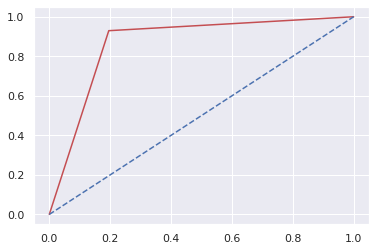

In [17]:
plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'b--')
plt.show()

In [18]:
y_pred_prob=model.predict_proba(x_test)[:,1]#considering 1 probability

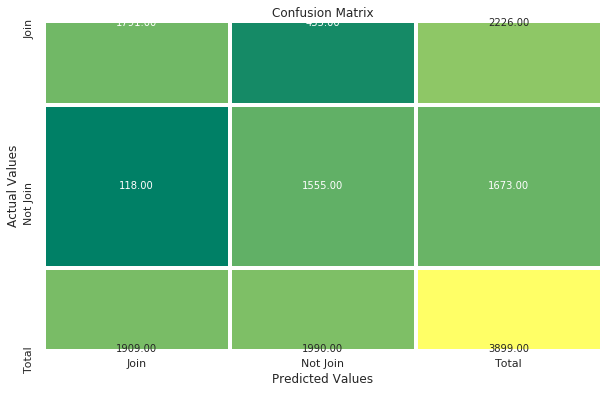

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.94      0.80      0.87      2226
           1       0.78      0.93      0.85      1673

    accuracy                           0.86      3899
   macro avg       0.86      0.87      0.86      3899
weighted avg       0.87      0.86      0.86      3899


************************************Kappa Score************************************


Kappa Score = 0.7171708731570302

******************************Area Under Curve Score******************************


AUC Score = 0.8670251158804092
Number of probabilities to build ROC = 18


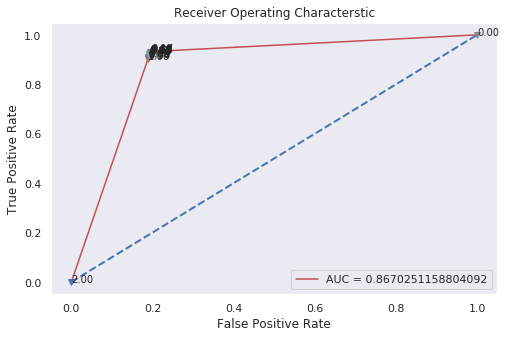

In [19]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['Join','Not Join'],n=1,verbose=True)

In [20]:
#pydot is used for visualizing trees

In [21]:
import pydotplus

In [22]:
export_graphviz(model,out_file='HR_.odt',feature_names=x_train.columns,filled=True)

In [23]:
graph=pydotplus.graph_from_dot_file('HR_.odt')

In [24]:
graph.write_pdf('HR_tree.pdf')

True

In [25]:
graph.write_jpg('HR_tree.jpg')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.560129 to fit



True

In [26]:
from IPython.display import Image
Image("HR_tree.jpg")

# Grid Search CV

In [27]:
from sklearn.model_selection import GridSearchCV#gridsearch cross validation
#hyperparameter tuning
#inorder to find at which depth we get best auc i.e., less loss

In [28]:
model_tune=DecisionTreeClassifier()

In [29]:
tuned_parameter=[{'criterion':['gini','entropy'],'max_depth':range(2,10)}]

In [30]:
strat=GridSearchCV(model_tune,param_grid=tuned_parameter,cv=10,scoring='roc_auc')

In [31]:
strat.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [32]:
strat.best_score_

0.7875661093249584

In [33]:
strat.best_params_


{'criterion': 'gini', 'max_depth': 9}

In [34]:
#we can build model with this parameters to get rules

In [35]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=9)

In [36]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
y_pred1=model1.predict(x_test)
y_pred1

array([0, 1, 0, ..., 1, 0, 1])

In [38]:
export_graphviz(model1,out_file='HR__.odt',feature_names=x_train.columns,filled=True)

In [39]:
graph1=pydotplus.graph_from_dot_file('HR__.odt')

In [40]:
graph1.write_jpg('HR__tree.jpg')

True

In [ ]:
from IPython.display import Image
Image("HR__tree.jpg")

In [ ]:

#default threshold is 0.5 for y predict
#confusion matrix
cm=confusion_matrix(y_test,y_pred1)
print(cm)
print('-'*20)
cr=classification_report(y_test,y_pred1)
print(cr)
print('-'*20)
kappa_score=cohen_kappa_score(y_test,y_pred1)
print("kappa score = ",kappa_score)
print('-'*20)
auc_score=roc_auc_score(y_test,y_pred1)
print('AUC score',auc_score)

**Here we can see the worst kappa score,So there is no need to model the data after having criterian: gini and max_depth: 9**

In [ ]:
Image('HR__tree.jpg')

**Some of the strategies for joining of a candidate from the above tree are:**

 Rule 1:
- If candidate.relocate.actual_yes and Notice.period<=37.5 days and Duration.to.accept.offer<=70.5 days and candidate.source.employee.referral and Duration.to.accept.offfer<=1.5days and Location is Noida and Age <=26.5 and percent.hike.offered.in.CTC<=69.275% and Location_Chennai then the probability is 0.568

Rule 2:
- If a candidate.relocate.actual_yes and Notice.period>37.5days and LOB_INFRA is yes and Duration.to.accept.to.offer<=26.5 days and Duration.to.accept.offer>0.5 and Age<=30.5 and Rex in yrs>1.5 and percent.difference.CTC<=40.065 and percent.hike.offered.in.CTC<=115.48 then having 890 samples wuth 0.205 probability.

Rule 3:
- If a candidate.relocate.actual_yes and Notice.period>37.5days and LOB_INFRA is yes and Duration.to.accept.to.offer<=26.5 days and Duration.to.accept.offer>0.5 and Age>30.5 and joining_bonus_yes and Rex.in.yrs<=12.5 and percent.difference.CTC<=-7.07 then having 196 samples with 0.176 probability.

Rule 4:
- If a candidate.relocate.actual_yes and Notice.period>37.5days and LOB_INFRA is yes and Duration.to.accept.to.offer<=26.5 days and Duration.to.accept.offer>0.5 and Age>30.5 and joining_bonus_yes and Rex.in.yrs<=12.5 and percent.difference.CTC>-7.07 then having 316 samples with 0.3449 probability.

Rule 5:
- If a candidate.relocate.actual_yes and Notice.period>37.5days and LOB_INFRA is yes and Duration.to.accept.to.offer>26.5 and Notice.period<=82.5 and Duration.to.accept.offer<=106.0 and Age<=36.5 and Location_Noida the Notice.period<=52.5 the having 151 samples with 0.357 probability

Rule 6:
-  If a candidate.relocate.actual_yes and Notice.period>37.5days and LOB_INFRA is yes and Duration.to.accept.to.offer>26.5 and Notice.period<=82.5 and Duration.to.accept.offer<=106.0 and Age<=36.5 and Location_Noida the Notice.period>52.5 the having 488 samples with 0.495 probability

Rule 7:
- If a candidate.relocate.actual_yes and Notice.period>37.5days and LOB_INFRA is yes and Duration.to.accept.to.offer>26.5 and Notice.period<=82.5 and Duration.to.accept.offer<=106.0 and Age<=36.5 and Location_Noida is No and Duration.to.accept.offer<=60.5 then having 64 samples with 0.578 probability

Rule 8:
-  If a candidate.relocate.actual_yes and Notice.period>37.5days and LOB_INFRA is yes and Duration.to.accept.to.offer>26.5 and Notice.period<=82.5 and Duration.to.accept.offer<=106.0 and Age<=36.5 and Location_Noida is No and Duration.to.accept.offer>60.5 then having 29 samples with 0.862 probability

Rule 9:
- If candidate.relocate.actual_yes and Notice.period<=37.5 and Duration.to.accept.offer<=70.5 and Candidate.source_employee.Referral<=0.5 and Duration.to.accept.offer>1.5 and percent.difference.CTC>-4.495 and Offered_bandE0 <=0.5 and Rex.in.yrs <=4.5 and Duration.to.accept.offer<=18.5 then having 751 samples with 0.627 probability 

Rule 10:
- If candidate.relocate.actual_yes and Notice.period<=37.5 and Duration.to.accept.offer<=70.5 and Candidate.source_employee.Referral<=0.5 and Duration.to.accept.offer>1.5 and percent.difference.CTC>-4.495 and Offered_bandE0 <=0.5 and Rex.in.yrs <=4.5 and Duration.to.accept.offer>18.5 then having 497 samples with 0.734 probability 

*These are some strategies git from Decision Tree with max_depth=9 and criteria=gini*